---

Libreta jupyter sobre el trabajo de investigación:

**"Estimación de la evapotranspiración espacio-temporal en arrozales usando imágenes satelitales, Departamento de Lambayeque"**

Autor: Cesar Francisco Vilca Gamarra 

Repositorio alojado en [GitHub](https://github.com/vilcagamarracf/Inv_arroz_METRIC) 

Marzo, 2022

---

# Sección iterativa y parámetro H

## Imports

In [1]:
import math
from funciones import *

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 30) # Visualizar máximo de 30 columnas

plt.rcParams['font.family'] = 'serif'  
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['figure.dpi'] = 72

In [16]:
# ------------------------------------------------------------------------------------------------
# Pruebas: En caso de realizar alguna edición al archivo 'funciones.py' realizar lo siguiente:
# ------------------------------------------------------------------------------------------------

import importlib
import sys

importlib.reload(sys.modules['funciones']) # Importa las funciones del archivo con las modificaciones aplicadas
from funciones import *

## Desarrollo de la sección iterativa

N iteraciones: 27
Coeficientes finales:
 a: 0.11509
 b: -32.58494


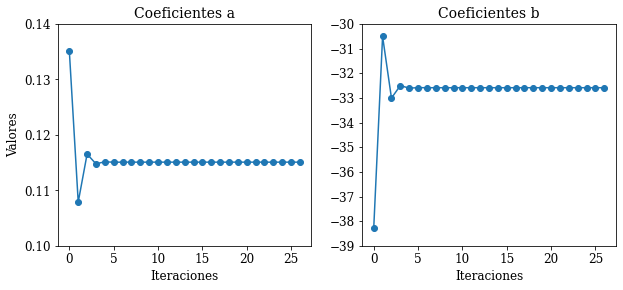

In [5]:
# Valores
pix_values_f = {
    'Ts_k': 290.869873,
    'Ts': 290.869873 - 273.15,
    'R_n': 529.7671931,
    'G':60.68105961,
    'Elev_m': 232.551712,
    'LAI': 1.968574,
    'Slope_d': 0
}

pix_values_c = {
    'Ts_k': 314.259521,
    'Ts': 314.259521 - 273.15,
    'R_n': 601.9251246,
    'G': 124.5408483,
    'Elev_m': 231.477097,
    'LAI': 0.022141,
    'Slope_d': 0
}

elev_station = 2.9 # m
dato_ws = 34.92    # km/hr
dato_et = 0.43     # mm/hr

# Parte iterativa: Iteracion 1 
resultados_f = []
resultados_c = []

pix_values_fpros = procesado_inicial(pix_values_f, elev_station, dato_ws, dato_et, Kc=1.05)
pix_values_cpros = procesado_inicial(pix_values_c, elev_station, dato_ws, dato_et, Kc=0)

pix_f_procesado, pix_c_procesado = get_H(pix_values_fpros, pix_values_cpros)

u_200 = 17.780523937825766 # m/s

pix_f_stability_cor = stability_corr(pix_f_procesado)
pix_c_stability_cor = stability_corr(pix_c_procesado)

resultados_f.append({**{'iter':1}, **pix_f_procesado, **pix_f_stability_cor})
resultados_c.append({**{'iter':1}, **pix_c_procesado, **pix_c_stability_cor})

# Parte iterativa: N Iteraciones 
x = 0
n_iter = 27

while x < n_iter-1:

    pix_f_iter = iteracion(u_200, resultados_f[-1], pix_values_f, pix_values_fpros['H0'])
    pix_c_iter = iteracion(u_200, resultados_c[-1], pix_values_c, pix_values_cpros['H0'])

    pix_f_post_iter, pix_c_post_iter = get_H(pix_f_iter, pix_c_iter)

    pix_f_stability_cor = stability_corr(pix_f_post_iter)
    pix_c_stability_cor = stability_corr(pix_c_post_iter)

    resultados_f.append({**{'iter':x+2}, **pix_f_post_iter, **pix_f_stability_cor})
    resultados_c.append({**{'iter':x+2}, **pix_c_post_iter, **pix_c_stability_cor})
    
    x+=1

# Valores de coeficientes
coefs_a = []
coefs_b = []

for coefs in resultados_f:
    coefs_a.append(coefs['a_coef'])
    coefs_b.append(coefs['b_coef'])

# Grafica
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs[0].plot(coefs_a, '-o')
axs[0].set(title='Coeficientes a', ylabel='Valores', xlabel='Iteraciones')
axs[0].set_ylim([0.1, 0.14])
axs[0].set_yticks([0.1, 0.11, 0.12, 0.13, 0.14])
axs[1].plot(coefs_b, '-o')
axs[1].set(title='Coeficientes b',xlabel='Iteraciones')
axs[1].set_ylim([-39, -30]);

print(f'N iteraciones: {n_iter}')
print(f'Coeficientes finales:\n a: {coefs_a[-1]:.5}\n b: {coefs_b[-1]:.7}')

In [3]:
resultados_f_df = pd.DataFrame(resultados_f)
columnas = ['u*', 'r_ah', 'air_dens_p', 'dT0', 'dT1', 'H1', 'a_coef', 'b_coef', 'L', 'y200m', 'yhz2', 'yhz1']
resultados_f_df#[columnas]

,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,dT1,H1,a_coef,b_coef,L,y200m,yhz2,yhz1
0,1,290.869873,292.362609,0.035434,17.780524,0.843909,8.658120,1.160130,529.767193,60.68106,308.422296,160.663837,1.194267,1.194267,160.663837,0.135064,-38.293475,-315.104584,0.897803,0.048945,0.002534
1,2,290.869873,292.362609,0.035434,NaN,0.941791,7.638072,1.174045,NaN,NaN,NaN,NaN,1.041079,1.041079,160.663837,0.107886,-30.500782,-443.209881,0.750682,0.035160,0.001803
2,3,290.869873,292.362609,0.035434,NaN,0.924225,7.817693,1.173424,NaN,NaN,NaN,NaN,1.066125,1.066125,160.663837,0.116537,-33.005018,-418.647947,0.774234,0.037167,0.001908
3,4,290.869873,292.362609,0.035434,NaN,0.926992,7.789348,1.173526,NaN,NaN,NaN,NaN,1.062167,1.062167,160.663837,0.114788,-32.497483,-422.457174,0.770464,0.036841,0.001891
4,5,290.869873,292.362609,0.035434,NaN,0.926548,7.793895,1.173510,NaN,NaN,NaN,NaN,1.062802,1.062802,160.663837,0.115150,-32.602892,-421.844450,0.771068,0.036893,0.001894
5,6,290.869873,292.362609,0.035434,NaN,0.926619,7.793167,1.173512,NaN,NaN,NaN,NaN,1.062700,1.062700,160.663837,0.115076,-32.581257,-421.942441,0.770971,0.036885,0.001893
6,7,290.869873,292.362609,0.035434,NaN,0.926608,7.793284,1.173512,NaN,NaN,NaN,NaN,1.062717,1.062717,160.663837,0.115091,-32.585687,-421.926755,0.770987,0.036886,0.001893
7,8,290.869873,292.362609,0.035434,NaN,0.926610,7.793265,1.173512,NaN,NaN,NaN,NaN,1.062714,1.062714,160.663837,0.115088,-32.584783,-421.929266,0.770984,0.036886,0.001893
8,9,290.869873,292.362609,0.035434,NaN,0.926610,7.793268,1.173512,NaN,NaN,NaN,NaN,1.062714,1.062714,160.663837,0.115089,-32.584967,-421.928864,0.770984,0.036886,0.001893
9,10,290.869873,292.362609,0.035434,NaN,0.926610,7.793268,1.173512,NaN,NaN,NaN,NaN,1.062714,1.062714,160.663837,0.115089,-32.584929,-421.928928,0.770984,0.036886,0.001893


In [4]:
resultados_f[0]

{'iter': 1,
 'Ts_k': 290.869873,
 'Ts_dem': 292.362609128,
 'Z_om': 0.035434332,
 'u_200': 17.780523937825766,
 'u*': 0.8439088277210368,
 'r_ah': 8.658120216102656,
 'air_dens_p': 1.1601300527484308,
 'R_n': 529.7671931,
 'G': 60.68105961,
 'LE': 308.42229625655,
 'H0': 160.66383723345,
 'dT0': 1.1942667933421582,
 'dT1': 1.194266793342159,
 'H1': 160.66383723345012,
 'a_coef': 0.13506426891232076,
 'b_coef': -38.293475265829755,
 'L': -315.10458423853044,
 'y200m': 0.8978031819307253,
 'yhz2': 0.04894540039376864,
 'yhz1': 0.002534018922745642}

## Desarrollo de función `parte_iterativa`

In [2]:
def parte_iterativa(n_iteraciones, 
                    elev_station,
                    pix_f_values, pix_c_values, 
                    dato_ws, dato_et):
    
    '''
    Realizar primera y n iteraciones que se indique. 

    Retorna diccionario con información de iteraciones. 
    - Temperatura y Temperatura corregida por dem
    - Z_om, u_200, u*, r_ah, air_dens
    - Coeficientes a y b
    - Valores de corrección por estabilidad L, y200m, yhz2, yhz1
    '''

    # Establecer listas de inicio
    resultados_f = []
    resultados_c = []

    # 1er Iteración: Condición estable de la atmóstfera

    pix_f_procesadoinicial = procesado_inicial(pix_f_values, elev_station, dato_ws, dato_et, Kc=1.05)
    pix_c_procesadoinicial = procesado_inicial(pix_c_values, elev_station, dato_ws, dato_et, Kc=0) 

    u_200 = pix_f_procesadoinicial['u_200']

    pix_f_procesado, pix_c_procesado = get_H(pix_f_procesadoinicial, pix_c_procesadoinicial)

    pix_f_stability_cor = stability_corr(pix_f_procesado)
    pix_c_stability_cor = stability_corr(pix_c_procesado)
    
    resultados_f.append({**{'iter':1}, **pix_f_procesado, **pix_f_stability_cor})
    resultados_c.append({**{'iter':1}, **pix_c_procesado, **pix_c_stability_cor})

    # Parte iterativa: N Iteraciones 
    x = 0

    while x < n_iteraciones-1:

        pix_f_iter = iteracion(u_200, resultados_f[-1], pix_f_values, pix_f_procesadoinicial['H0'])
        pix_c_iter = iteracion(u_200, resultados_c[-1], pix_c_values, pix_c_procesadoinicial['H0'])

        pix_f_post_iter, pix_c_post_iter = get_H(pix_f_iter, pix_c_iter)

        pix_f_stability_cor = stability_corr(pix_f_post_iter)
        pix_c_stability_cor = stability_corr(pix_c_post_iter)

        resultados_f.append({**{'iter':x+2}, **pix_f_post_iter, **pix_f_stability_cor})
        resultados_c.append({**{'iter':x+2}, **pix_c_post_iter, **pix_c_stability_cor})

        x+=1

    return resultados_f, resultados_c

## Comprobación

Se realiza las iteraciones hasta que se estabilicen los valores de dT y rah del pixel caliente.

### Caso de Excel

In [26]:
# 1. Valores de caso en excel

pix_f_values = {
    'Ts_k': 290.869873,
    'R_n': 529.7671931,
    'G':60.68105961,
    'Elev_m': 232.551712,
    'LAI': 1.968574,
    'Slope_d': 0
}

pix_c_values = {
    'Ts_k': 314.259521,
    'R_n': 601.9251246,
    'G': 124.5408483,
    'Elev_m': 231.477097,
    'LAI': 0.022141,
    'Slope_d': 0
}

elev_station = 2.9 # m
dato_ws = 34.92    # km/hr
dato_et = 0.43     # mm/hr

n_iteraciones = 27

# Parte iterativa
list_f, list_c = parte_iterativa(n_iteraciones, 
                                 elev_station,
                                 pix_f_values, pix_c_values, 
                                 dato_ws, dato_et)

# Visualizar resultados
list_c_df = pd.DataFrame(list_c)
list_c_df

,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,dT1,H1,a_coef,b_coef,L,y200m,yhz2,yhz1
0,1,314.259521,315.745272,0.005,17.780524,0.687956,10.620836,1.160276,601.925125,124.540848,0.0,477.384276,4.352429,4.352429,477.384276,0.135064,-38.293475,-62.078886,1.783647,0.218646,0.012764
1,2,314.259521,315.745272,0.005,NaN,0.827190,8.226057,1.097539,NaN,NaN,NaN,NaN,3.563743,3.563743,477.384276,0.107886,-30.500782,-102.079084,1.482720,0.140985,0.007791
2,3,314.259521,315.745272,0.005,NaN,0.799877,8.728590,1.094752,NaN,NaN,NaN,NaN,3.791077,3.791077,477.384276,0.116537,-33.005018,-92.063511,1.543225,0.154714,0.008634
3,4,314.259521,315.745272,0.005,NaN,0.805223,8.631607,1.095554,NaN,NaN,NaN,NaN,3.746211,3.746211,477.384276,0.114788,-32.497483,-93.990457,1.531003,0.151868,0.008458
4,5,314.259521,315.745272,0.005,NaN,0.804138,8.651360,1.095396,NaN,NaN,NaN,NaN,3.755327,3.755327,477.384276,0.115150,-32.602892,-93.597290,1.533473,0.152440,0.008493
5,6,314.259521,315.745272,0.005,NaN,0.804357,8.647375,1.095428,NaN,NaN,NaN,NaN,3.753487,3.753487,477.384276,0.115076,-32.581257,-93.676581,1.532974,0.152324,0.008486
6,7,314.259521,315.745272,0.005,NaN,0.804312,8.648181,1.095421,NaN,NaN,NaN,NaN,3.753859,3.753859,477.384276,0.115091,-32.585687,-93.660552,1.533075,0.152348,0.008487
7,8,314.259521,315.745272,0.005,NaN,0.804321,8.648018,1.095423,NaN,NaN,NaN,NaN,3.753783,3.753783,477.384276,0.115088,-32.584783,-93.663791,1.533054,0.152343,0.008487
8,9,314.259521,315.745272,0.005,NaN,0.804320,8.648051,1.095423,NaN,NaN,NaN,NaN,3.753799,3.753799,477.384276,0.115089,-32.584967,-93.663137,1.533058,0.152344,0.008487
9,10,314.259521,315.745272,0.005,NaN,0.804320,8.648044,1.095423,NaN,NaN,NaN,NaN,3.753796,3.753796,477.384276,0.115089,-32.584929,-93.663269,1.533058,0.152344,0.008487


In [30]:
# Comprobación de coeficiente b 
# b = dT_hot - a*Ts_hot
print(3.753796 - 0.115089*315.745272) # Temperatura en K 
print(3.753796 -32.584936*(315.745272-273.15)) # Temperatura en °C

-32.585011609207996
-1384.2104160225927


<Axes: xlabel='iter'>

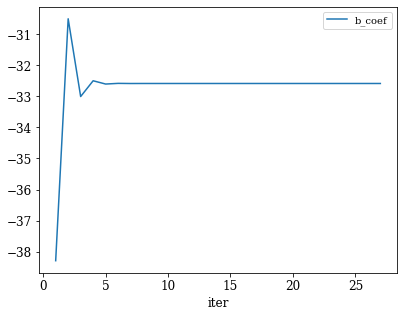

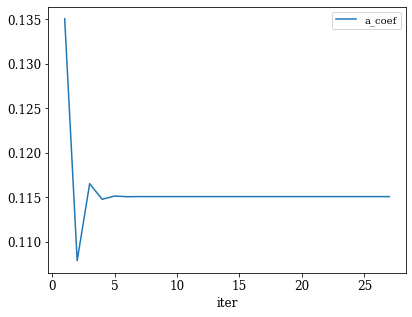

In [4]:
# Gráfica de coeficientes
list_c_df.plot('iter', 'b_coef')
list_c_df.plot('iter', 'a_coef')

### Datos propios

#### 2022-01-13

In [29]:
# Procesando imagen 2022-01-13
pix_f_values = {'Albedo': 0.12827376471033497,
 'Elev_m': 46,
 'G': 98.56008630383153,
 'LAI': 1.00888777350927,
 'NDVI': 0.43160180390846825,
 'R_n': 630.1278162547657,
 'SAVI': 0.23416074179539104,
 'Slope_d': 2.630251407623291,
 'T_sw': 0.671105059235324,
 'Ts_c': 18.29602082685659,
 'Ts_k': 291.44602082685657,
 'e_0': 0.9600888777350927}

pix_c_values = {'Albedo': 0.1729629814053416,
 'Elev_m': 45,
 'G': 95.44079810337884,
 'LAI': 0.37526507397182696,
 'NDVI': 0.13498973596658878,
 'R_n': 579.2178904082016,
 'SAVI': 0.08112945597048568,
 'Slope_d': 2.075801134109497,
 'T_sw': 0.671217857822568,
 'Ts_c': 25.992497393938834,
 'Ts_k': 299.1424973939388,
 'e_0': 0.9537526507397183}

elev_station = 2.9 # m
dato_ws = 1.6      # km/hr
dato_et = 0.3     # mm/hr

n_iteraciones = 40

# Parte iterativa
list_f, list_c = parte_iterativa(n_iteraciones, 
                                 elev_station,
                                 pix_f_values, pix_c_values, 
                                 dato_ws, dato_et)

# Resultados
list_f_df = pd.DataFrame(list_f)
list_c_df = pd.DataFrame(list_c)

list_c_df

,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,dT1,H1,a_coef,b_coef,L,y200m,yhz2,yhz1
0,1,299.142497,299.416147,0.006755,0.814686,0.032442,225.219543,1.185867,579.21789,95.440798,0.0,483.777092,91.512800,91.512800,483.777092,4.861624,-1364.135912,-0.006250,9.645358,7.182546,4.283783
1,2,299.142497,299.416147,0.006755,NaN,0.513511,0.460578,1.674311,NaN,NaN,NaN,NaN,0.132550,0.132550,483.777092,0.007849,-2.217602,-34.994429,2.158292,0.350954,0.022478
2,3,299.142497,299.416147,0.006755,NaN,0.041047,158.489105,1.162626,NaN,NaN,NaN,NaN,65.685714,65.685714,483.777092,2.290056,-619.994087,-0.012411,8.987370,6.508018,3.648819
3,4,299.142497,299.416147,0.006755,NaN,0.255279,1.304482,1.489084,NaN,NaN,NaN,NaN,0.422115,0.422115,483.777092,0.034149,-9.802506,-3.823669,3.823105,1.416500,0.182408
4,5,299.142497,299.416147,0.006755,NaN,0.051604,83.261847,1.163753,NaN,NaN,NaN,NaN,34.474404,34.474404,483.777092,-0.632280,223.789149,-0.024685,8.333025,5.836534,3.033047
5,6,299.142497,299.416147,0.006755,NaN,0.170176,2.755327,1.313482,NaN,NaN,NaN,NaN,1.010789,1.010789,483.777092,0.089567,-25.806999,-0.999155,4.953222,2.431877,0.534605
6,7,299.142497,299.416147,0.006755,NaN,0.062520,42.852782,1.166051,NaN,NaN,NaN,NaN,17.708145,17.708145,483.777092,-1.391636,434.386528,-0.043984,7.788150,5.277501,2.537739
7,8,299.142497,299.416147,0.006755,NaN,0.133200,4.687077,1.235232,NaN,NaN,NaN,NaN,1.828374,1.828374,483.777092,0.160295,-46.166643,-0.450580,5.653613,3.113431,0.897881
8,9,299.142497,299.416147,0.006755,NaN,0.071953,26.446156,1.169258,NaN,NaN,NaN,NaN,10.898431,10.898431,483.777092,-1.054656,326.679454,-0.067231,7.391094,4.870698,2.190481
9,10,299.142497,299.416147,0.006755,NaN,0.114992,6.692172,1.206050,NaN,NaN,NaN,NaN,2.673704,2.673704,483.777092,0.219433,-63.028073,-0.283064,6.070670,3.529352,1.164002


coef a: 0.11468118099666913
coef b: -29.41266905988256


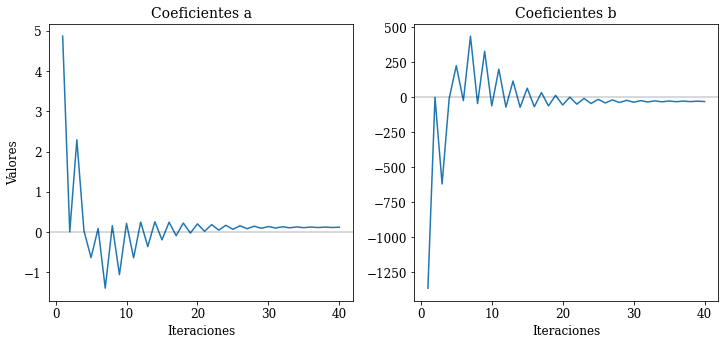

In [30]:
# Grafica
n_coefa = list_c_df['a_coef'][list_c_df['iter'] == n_iteraciones-1].values[0]
n_coefb = list_c_df['b_coef'][list_c_df['iter'] == n_iteraciones-1].values[0]
print(f'coef a: {n_coefa}\ncoef b: {n_coefb}')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axs[0].plot(list_c_df['iter'], list_c_df['a_coef'])
axs[0].axhline(0, color='black', alpha=.2)
axs[0].set(title='Coeficientes a', ylabel='Valores', xlabel='Iteraciones')
axs[1].plot(list_c_df['iter'], list_c_df['b_coef'])
axs[1].axhline(0, color='black', alpha=.2)
axs[1].set(title='Coeficientes b',xlabel='Iteraciones');

#### 2022-01-29 (Error)

In [31]:
# Procesando imagen 2022-01-29
pix_f_values = {'Albedo': 0.190847786429444,
 'Elev_m': 46,
 'G': 70.49290096680541,
 'LAI': 1.5653886222685907,
 'NDVI': 0.6921115168376513,
 'R_n': 543.8013354581973,
 'SAVI': 0.4662258899084076,
 'Slope_d': 2.7987983226776123,
 'T_sw': 0.6711848548380892,
 'Ts_c': 15.48396223807515,
 'Ts_k': 288.6339622380751,
 'e_0': 0.9656538862226859}

pix_c_values = {'Albedo': 0.13716365099530076,
 'Elev_m': 45,
 'G': 83.83517674696029,
 'LAI': 0.41000200789993424,
 'NDVI': 0.15125082290980912,
 'R_n': 600.0480830584637,
 'SAVI': 0.08275036791056542,
 'Slope_d': 0.9274099469184875,
 'T_sw': 0.6712322363486736,
 'Ts_c': 18.572854316694077,
 'Ts_k': 291.72285431669405,
 'e_0': 0.9541000200789993}

elev_station = 2.9 # m
dato_ws = 1.6      # km/hr
dato_et = 0.69     # mm/hr

n_iteraciones = 40

# Parte iterativa
list_f, list_c = parte_iterativa(n_iteraciones, 
                                 elev_station,
                                 pix_f_values, pix_c_values, 
                                 dato_ws, dato_et)

# Resultados
list_f_df = pd.DataFrame(list_f)
list_c_df = pd.DataFrame(list_c)

list_c_df

UnboundLocalError: local variable 'y200m' referenced before assignment

In [ ]:
# Grafica
n_coefa = list_c_df['a_coef'][list_c_df['iter'] == n_iteraciones-1].values[0]
n_coefb = list_c_df['b_coef'][list_c_df['iter'] == n_iteraciones-1].values[0]
print(f'coef a: {n_coefa}\ncoef b: {n_coefb}')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axs[0].plot(list_c_df['iter'], list_c_df['a_coef'])
axs[0].axhline(0, color='black', alpha=.2)
axs[0].set(title='Coeficientes a', ylabel='Valores', xlabel='Iteraciones')
axs[1].plot(list_c_df['iter'], list_c_df['b_coef'])
axs[1].axhline(0, color='black', alpha=.2)
axs[1].set(title='Coeficientes b',xlabel='Iteraciones');

#### 2022-03-10

In [27]:
# Procesando imagen 2022-03-10
pix_f_values ={'Albedo': 0.14747657998818953,
 'Elev_m': 47,
 'G': 74.2912993855229,
 'LAI': 1.6667277490774906,
 'NDVI': 0.7395504864139549,
 'R_n': 591.7990797337761,
 'SAVI': 0.45378351611273904,
 'Slope_d': 0,
 'Ts_k': 297.9686066193107}

pix_c_values ={'Albedo': 0.05927686931620303,
 'Elev_m': 45,
 'G': 103.51950062549648,
 'LAI': 0.44480272076372307,
 'NDVI': 0.16754176610978513,
 'R_n': 653.9510830490566,
 'SAVI': 0.07040657755799914,
 'Slope_d': 1.3158267736434937,
 'T_sw': 0.6738636943512559,
 'Ts_c': 26.993116471875396,
 'Ts_k': 300.1431164718754}

elev_station = 2.9 # m
dato_ws = 3.2      # km/hr
dato_et = 0.53     # mm/hr

n_iteraciones = 40

# Parte iterativa
list_f, list_c = parte_iterativa(n_iteraciones, 
                                 elev_station,
                                 pix_f_values, pix_c_values, 
                                 dato_ws, dato_et)

# Resultados
list_f_df = pd.DataFrame(list_f)
list_c_df = pd.DataFrame(list_c)

list_c_df

,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,dT1,H1,a_coef,b_coef,L,y200m,yhz2,yhz1
0,1,300.143116,300.416766,0.008006,1.629372,0.065974,110.750429,1.185867,653.951083,103.519501,0.0,550.431582,51.201093,51.201093,550.431582,18.449463,-5491.326919,-0.046351,7.738939,5.227045,2.494000
1,2,300.143116,300.416766,0.008006,NaN,0.279880,2.289195,1.396457,NaN,NaN,NaN,NaN,0.898721,0.898721,550.431582,0.088534,-25.698306,-4.167263,3.753222,1.359109,0.169061
2,3,300.143116,300.416766,0.008006,NaN,0.104830,42.011733,1.161715,NaN,NaN,NaN,NaN,19.826248,19.826248,550.431582,6.625793,-1970.672935,-0.182166,6.470952,3.933035,1.449200
3,4,300.143116,300.416766,0.008006,NaN,0.182781,6.830723,1.240156,NaN,NaN,NaN,NaN,3.019673,3.019673,550.431582,0.562373,-165.926642,-1.030808,4.926196,2.406157,0.522847
4,5,300.143116,300.416766,0.008006,NaN,0.128479,21.118049,1.170008,NaN,NaN,NaN,NaN,9.895429,9.895429,550.431582,2.931172,-870.677885,-0.337746,5.911562,3.370014,1.058469
5,6,300.143116,300.416766,0.008006,NaN,0.158519,10.527092,1.197725,NaN,NaN,NaN,NaN,4.818602,4.818602,550.431582,1.103182,-326.595887,-0.649397,5.329794,2.795109,0.716143
6,7,300.143116,300.416766,0.008006,NaN,0.139291,16.052854,1.177135,NaN,NaN,NaN,NaN,7.476454,7.476454,550.431582,2.053999,-609.579217,-0.433011,5.689075,3.148564,0.919154
7,8,300.143116,300.416766,0.008006,NaN,0.150570,12.413343,1.187825,NaN,NaN,NaN,NaN,5.729358,5.729358,550.431582,1.411440,-418.290839,-0.551920,5.473414,2.935704,0.793912
8,9,300.143116,300.416766,0.008006,NaN,0.143591,14.504996,1.180776,NaN,NaN,NaN,NaN,6.734721,6.734721,550.431582,1.783800,-529.148577,-0.475830,5.605068,3.065419,0.869188
9,10,300.143116,300.416766,0.008006,NaN,0.147772,13.195994,1.184822,NaN,NaN,NaN,NaN,6.106025,6.106025,550.431582,1.546680,-458.542707,-0.520401,5.525528,2.986960,0.823260


coef a: 1.6338797804515508
coef b: -484.50854796931463


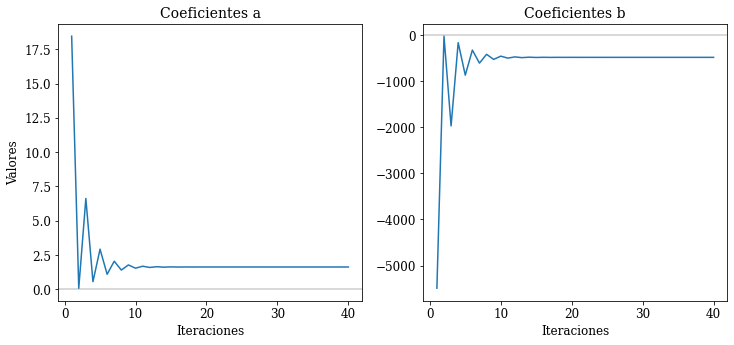

In [28]:
# Grafica
n_coefa = list_c_df['a_coef'][list_c_df['iter'] == n_iteraciones-1].values[0]
n_coefb = list_c_df['b_coef'][list_c_df['iter'] == n_iteraciones-1].values[0]
print(f'coef a: {n_coefa}\ncoef b: {n_coefb}')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axs[0].plot(list_c_df['iter'], list_c_df['a_coef'])
axs[0].axhline(0, color='black', alpha=.2)
axs[0].set(title='Coeficientes a', ylabel='Valores', xlabel='Iteraciones')
axs[1].plot(list_c_df['iter'], list_c_df['b_coef'])
axs[1].axhline(0, color='black', alpha=.2)
axs[1].set(title='Coeficientes b',xlabel='Iteraciones');

#### 2022-06-14

In [19]:
# Procesando imagen 2022-06-14
pix_f_values = {'Albedo': 0.18027227029185394,
 'Elev_m': 45,
 'G': 66.47171582121297,
 'LAI': 1.2312135011441645,
 'NDVI': 0.535677137507801,
 'R_n': 459.141401665235,
 'SAVI': 0.3480963199786044,
 'Slope_d': 2.0841052532196045,
 'T_sw': 0.6590966639583984,
 'Ts_c': 24.02104843881108,
 'Ts_k': 297.17104843881106,
 'e_0': 0.9623121350114416}

pix_c_values = {'Albedo': 0.09296234673562581,
 'Elev_m': 45,
 'G': 99.75277671208718,
 'LAI': 0.30989732334047115,
 'NDVI': 0.104389721627409,
 'R_n': 504.447449401512,
 'SAVI': 0.04442048314401466,
 'Slope_d': 0,
 'T_sw': 0.6592193096535455,
 'Ts_c': 31.87732831242232,
 'Ts_k': 305.0273283124223,
 'e_0': 0.9530989732334046}

elev_station = 2.9 # m
dato_ws = 1.6      # km/hr
dato_et = 0.46     # mm/hr

n_iteraciones = 40

# Parte iterativa
list_f, list_c = parte_iterativa(n_iteraciones, 
                                 elev_station,
                                 pix_f_values, pix_c_values, 
                                 dato_ws, dato_et)

# Resultados
list_f_df = pd.DataFrame(list_f)
list_c_df = pd.DataFrame(list_c)

list_c_df

,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,dT1,H1,a_coef,b_coef,L,y200m,yhz2,yhz1
0,1,305.027328,305.300978,0.005578,0.814686,0.031850,229.406205,1.185867,504.447449,99.752777,0.0,404.694673,77.976389,77.976389,404.694673,8.546761,-2531.357976,-0.007209,9.508072,7.041896,4.150293
1,2,305.027328,305.300978,0.005578,NaN,0.341136,0.744492,1.531096,NaN,NaN,NaN,NaN,0.195998,0.195998,404.694673,-0.001705,0.716510,-11.436126,2.961724,0.776559,0.066545
2,3,305.027328,305.300978,0.005578,NaN,0.044385,125.602839,1.140423,NaN,NaN,NaN,NaN,44.394291,44.394291,404.694673,4.955075,-1468.395026,-0.018762,8.593427,6.103793,3.275792
3,4,305.027328,305.300978,0.005578,NaN,0.176377,2.319458,1.333817,NaN,NaN,NaN,NaN,0.700945,0.700945,404.694673,0.009018,-2.052110,-1.376945,4.676894,2.171526,0.422443
4,5,305.027328,305.300978,0.005578,NaN,0.057488,52.891543,1.142316,NaN,NaN,NaN,NaN,18.663535,18.663535,404.694673,2.005975,-593.762709,-0.040832,7.858027,5.349159,2.600155
5,6,305.027328,305.300978,0.005578,NaN,0.127044,4.736784,1.213969,NaN,NaN,NaN,NaN,1.572786,1.572786,404.694673,0.066016,-18.581957,-0.468336,5.619194,3.079380,0.877485
6,7,305.027328,305.300978,0.005578,NaN,0.068615,28.217997,1.145598,NaN,NaN,NaN,NaN,9.928597,9.928597,404.694673,0.997356,-294.565122,-0.069629,7.358437,4.837277,2.162537
7,8,305.027328,305.300978,0.005578,NaN,0.106758,7.333491,1.178035,NaN,NaN,NaN,NaN,2.509263,2.509263,404.694673,0.150425,-43.415591,-0.269680,6.114438,3.573307,1.193851
8,9,305.027328,305.300978,0.005578,NaN,0.076387,19.677739,1.149144,NaN,NaN,NaN,NaN,6.902312,6.902312,404.694673,0.649348,-191.344292,-0.096364,7.056599,4.528757,1.909356
9,10,305.027328,305.300978,0.005578,NaN,0.097365,9.427250,1.166077,NaN,NaN,NaN,NaN,3.258753,3.258753,404.694673,0.227645,-66.241379,-0.202500,6.374443,3.835387,1.378023


coef a: 0.36599569088562045
coef b: -107.26854507143676


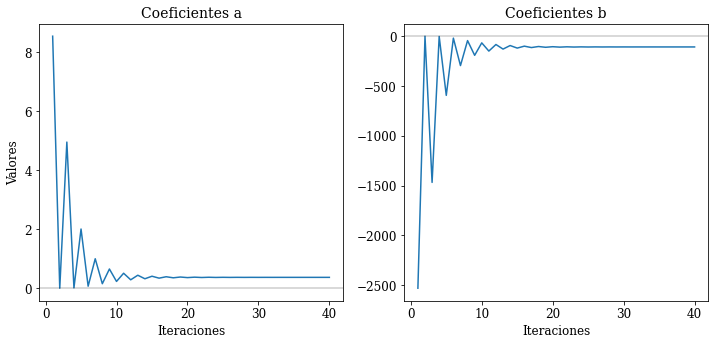

In [26]:
# Grafica
n_coefa = list_c_df['a_coef'][list_c_df['iter'] == n_iteraciones-1].values[0]
n_coefb = list_c_df['b_coef'][list_c_df['iter'] == n_iteraciones-1].values[0]
print(f'coef a: {n_coefa}\ncoef b: {n_coefb}')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axs[0].plot(list_c_df['iter'], list_c_df['a_coef'])
axs[0].axhline(0, color='black', alpha=.2)
axs[0].set(title='Coeficientes a', ylabel='Valores', xlabel='Iteraciones')
axs[1].plot(list_c_df['iter'], list_c_df['b_coef'])
axs[1].axhline(0, color='black', alpha=.2)
axs[1].set(title='Coeficientes b',xlabel='Iteraciones');